In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

from copulas.multivariate import VineCopula
from copulas.multivariate import GaussianMultivariate
from copulas.bivariate import Gumbel
from copulas.bivariate import Clayton
from copulas.bivariate import Frank

In [3]:
path = "../Data/"


In [4]:
data = pd.read_csv(path+'final.csv')
data = data.drop("Unnamed: 0",axis=1)
data.head()

,acc,linear_acc,rotation,game_rotation,sound,speed,gravity,light,mag_field,gyr,...,orient,target,acc_std,linear_acc_std,rotation_std,mag_field_std,gyr_std,uncalib_gyr_std,orient_std,target_name
0,9.707576,0.395114,0.695759,0.643702,88.941299,12.106335,9.806641,0.0,45.299669,0.171560,...,289.098009,0,1.276535,0.674885,0.005473,0.481351,0.155454,0.068428,0.161450,Bus
1,9.585344,0.955568,0.974789,0.575668,89.780316,6.750000,9.806650,1.0,47.775891,0.233873,...,166.814524,0,1.283430,0.360393,0.001145,0.966127,0.163807,0.183973,2.673915,Bus
2,9.854207,0.221997,0.690608,0.728962,76.264572,9.091069,9.806642,0.0,45.873524,0.045484,...,292.815815,0,0.293053,0.024615,0.009292,0.692043,0.003208,0.024883,0.230437,Bus
3,9.770933,1.341121,0.209953,0.361046,84.059241,5.368554,9.806649,0.0,45.303640,0.202622,...,338.585784,0,1.487307,0.919317,0.012744,1.061100,0.159019,0.159166,56.719639,Bus
4,9.874786,0.614802,0.699299,0.746692,78.168628,6.454336,9.806624,0.0,41.311621,0.117408,...,361.257574,0,0.607600,0.448189,0.015373,1.178017,0.056566,0.089277,0.273831,Bus


In [5]:
len(data)

5893

In [6]:
label = data['target']
print(label)

0       0
1       0
2       0
3       0
4       0
       ..
5888    4
5889    4
5890    4
5891    4
5892    4
Name: target, Length: 5893, dtype: int64


In [7]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Fusing : Rotation and Game Rotation 


In [8]:
rot = pd.DataFrame({'rotation':data['rotation'],'game_rotation':data['game_rotation']})
rot.head()

,rotation,game_rotation
0,0.695759,0.643702
1,0.974789,0.575668
2,0.690608,0.728962
3,0.209953,0.361046
4,0.699299,0.746692


In [9]:
regular = VineCopula('regular')
regular.fit(rot)

/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/multivariate/vine.py:68: UserWarning: Vines have not been fully tested on Python 3.8 and might produce wrong results. Please use Python 3.5, 3.6 or 3.7
  warnings.warn(
/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/bivariate/base.py:160: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn("Data does not appear to be uniform.", category=RuntimeWarning)


In [10]:
parameters = regular.to_dict()
parameters.keys()

dict_keys(['type', 'vine_type', 'fitted', 'n_sample', 'n_var', 'depth', 'truncated', 'trees', 'tau_mat', 'u_matrix', 'unis', 'columns'])

In [11]:
F1 = []
F2 = []
for i in range(len(parameters['u_matrix'])):
    F1.append(parameters['u_matrix'][i][0])
    F2.append(parameters['u_matrix'][i][1])

<IPython.core.display.Javascript object>


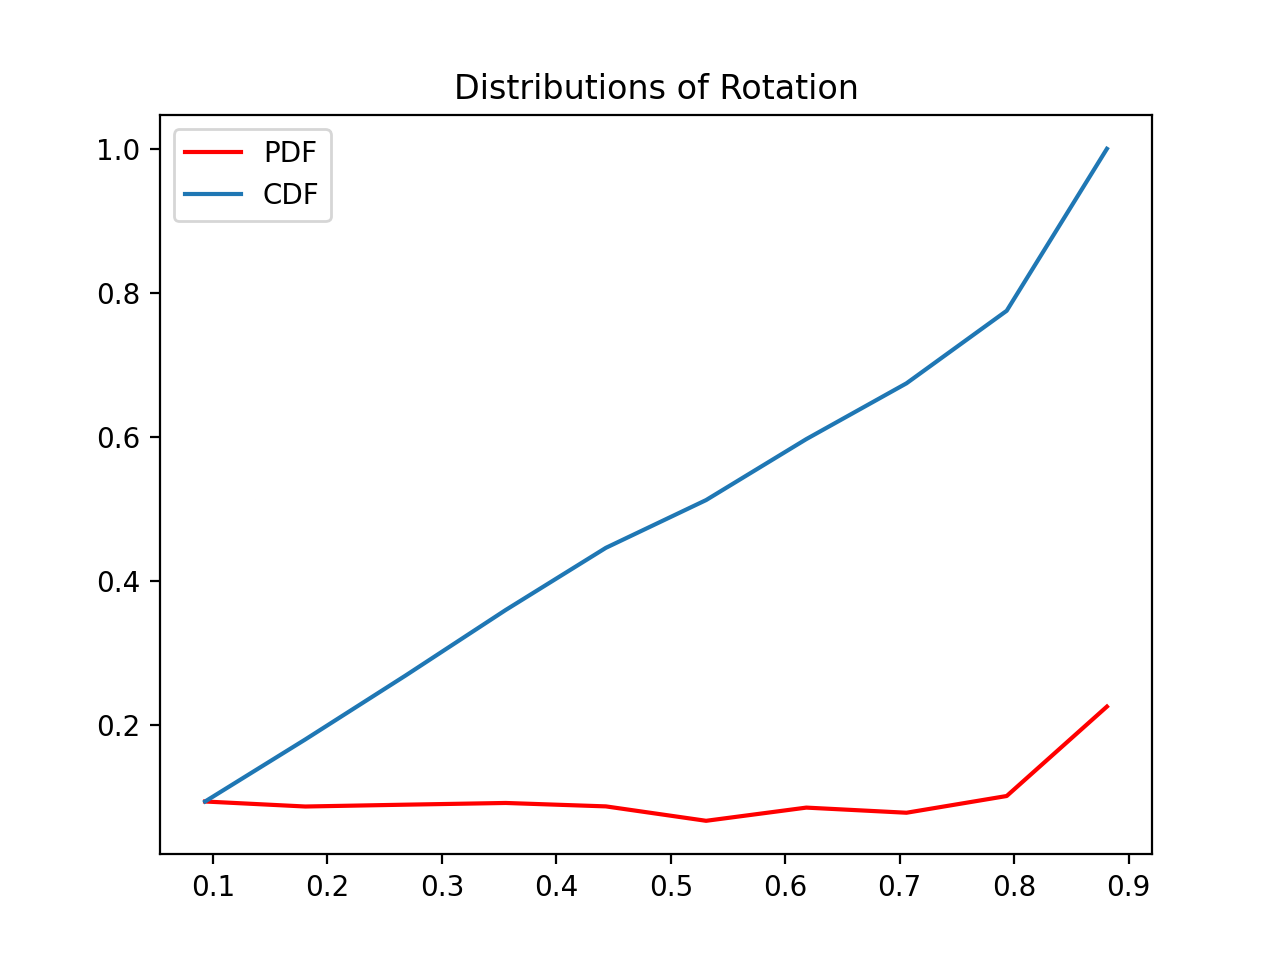

In [13]:
count, bins_count = np.histogram(F1, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title("Distributions of Rotation")
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


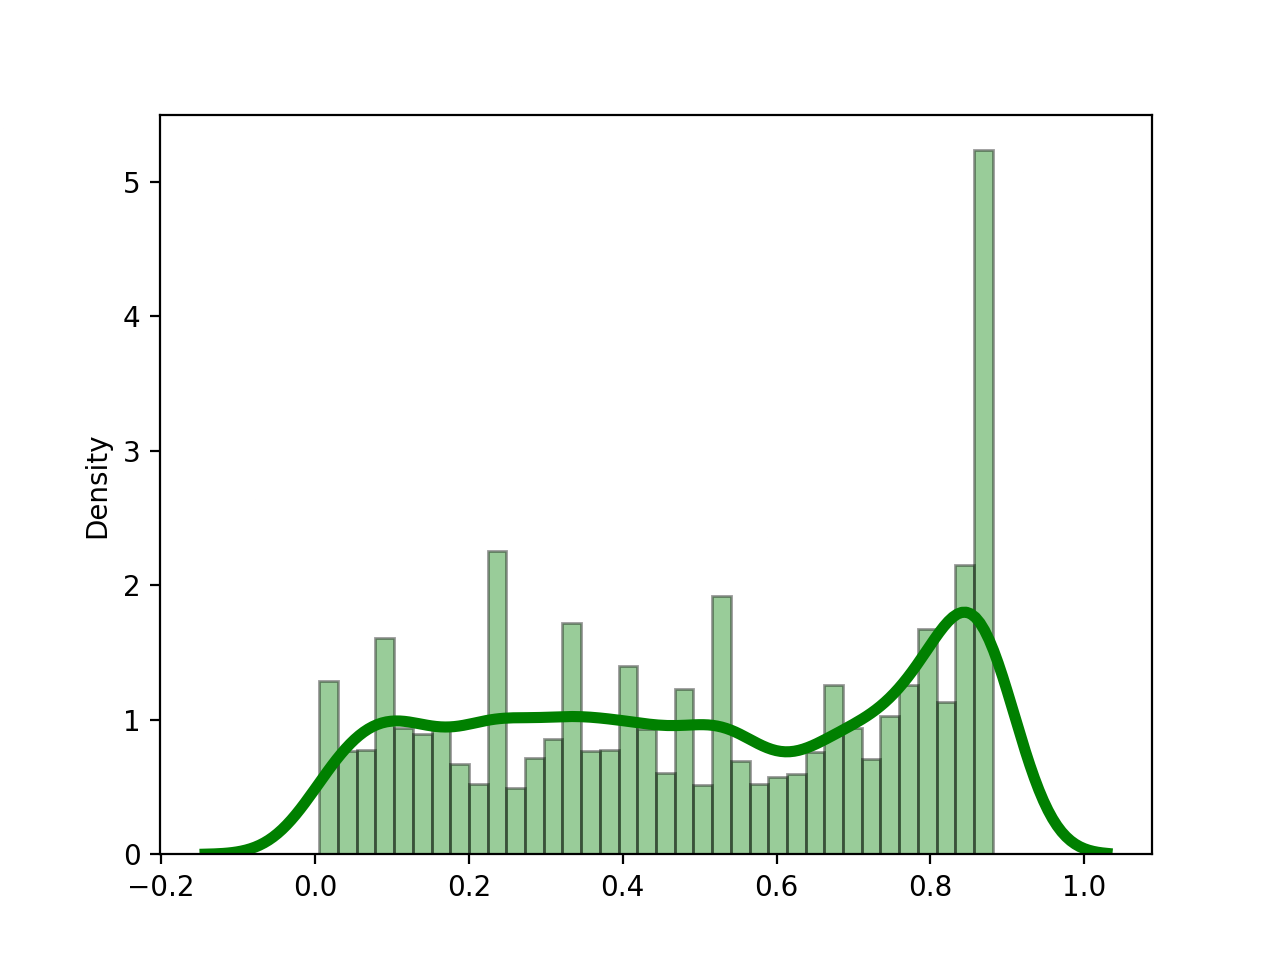

<AxesSubplot:ylabel='Density'>

In [15]:
sns.distplot(F1, hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<IPython.core.display.Javascript object>


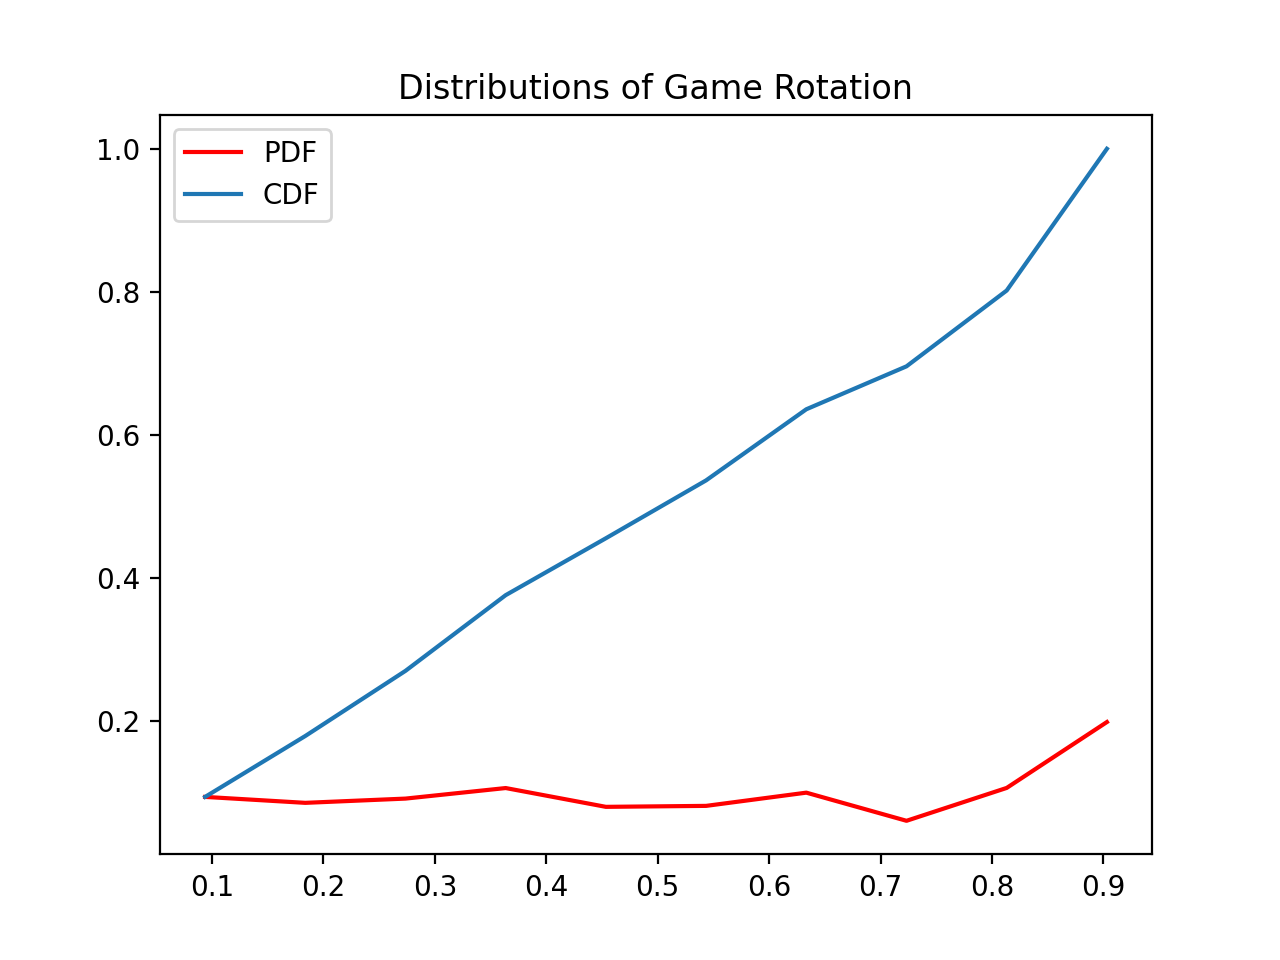

In [14]:
count, bins_count = np.histogram(F2, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title("Distributions of Game Rotation")
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


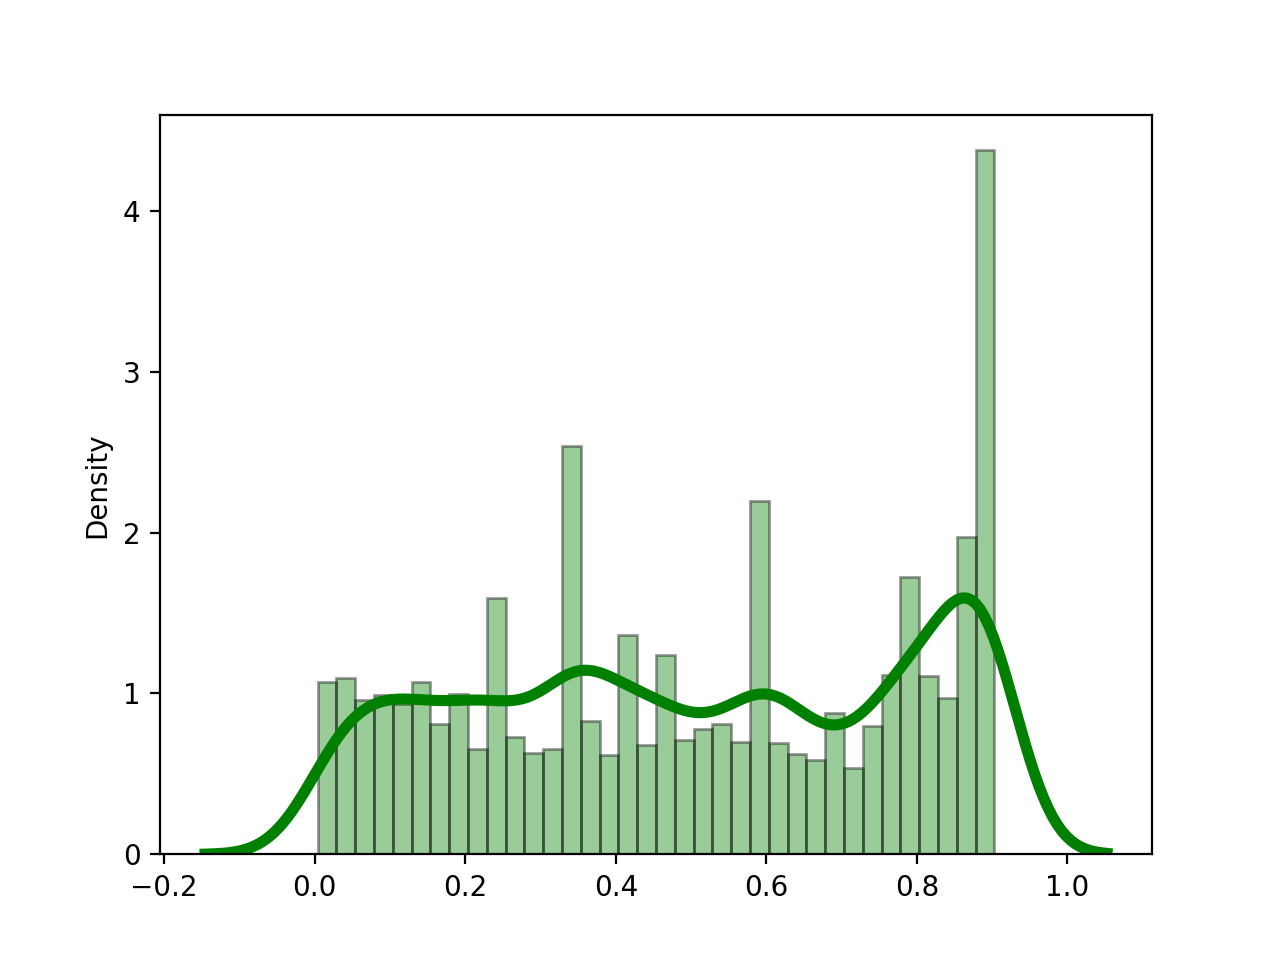

<AxesSubplot:ylabel='Density'>

In [16]:
sns.distplot(F2, hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [8]:
rot_norm = pd.DataFrame({'rot':NormalizeData(data['rotation']),'linear_rot':NormalizeData(data['game_rotation'])})

In [9]:
rot_norm.head()

,rot,linear_rot
0,0.689440,0.640912
1,0.974266,0.572345
2,0.684181,0.726840
3,0.193542,0.356043
4,0.693053,0.744708


In [19]:
X = rot.to_numpy()

In [11]:
len(X)

5893

In [12]:
type(X)

numpy.ndarray

In [13]:
X

array([[0.69575931, 0.64370229],
       [0.9747888 , 0.57566814],
       [0.69060773, 0.72896215],
       ...,
       [0.84604422, 0.84729619],
       [0.95508156, 0.7450224 ],
       [0.99090169, 0.91981458]])

In [16]:
X.shape

(5893, 2)

### AIC

In [17]:
def AIC(y, y_pred, k):
    mse = mean_squared_error(y, y_pred)
    aic = len(y) * log(mse) + 2 * k
    return aic

### Frank

In [20]:
frank = Frank()
frank.fit(X)
frank_fused = frank.probability_density(X)

/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/bivariate/base.py:160: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn("Data does not appear to be uniform.", category=RuntimeWarning)


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


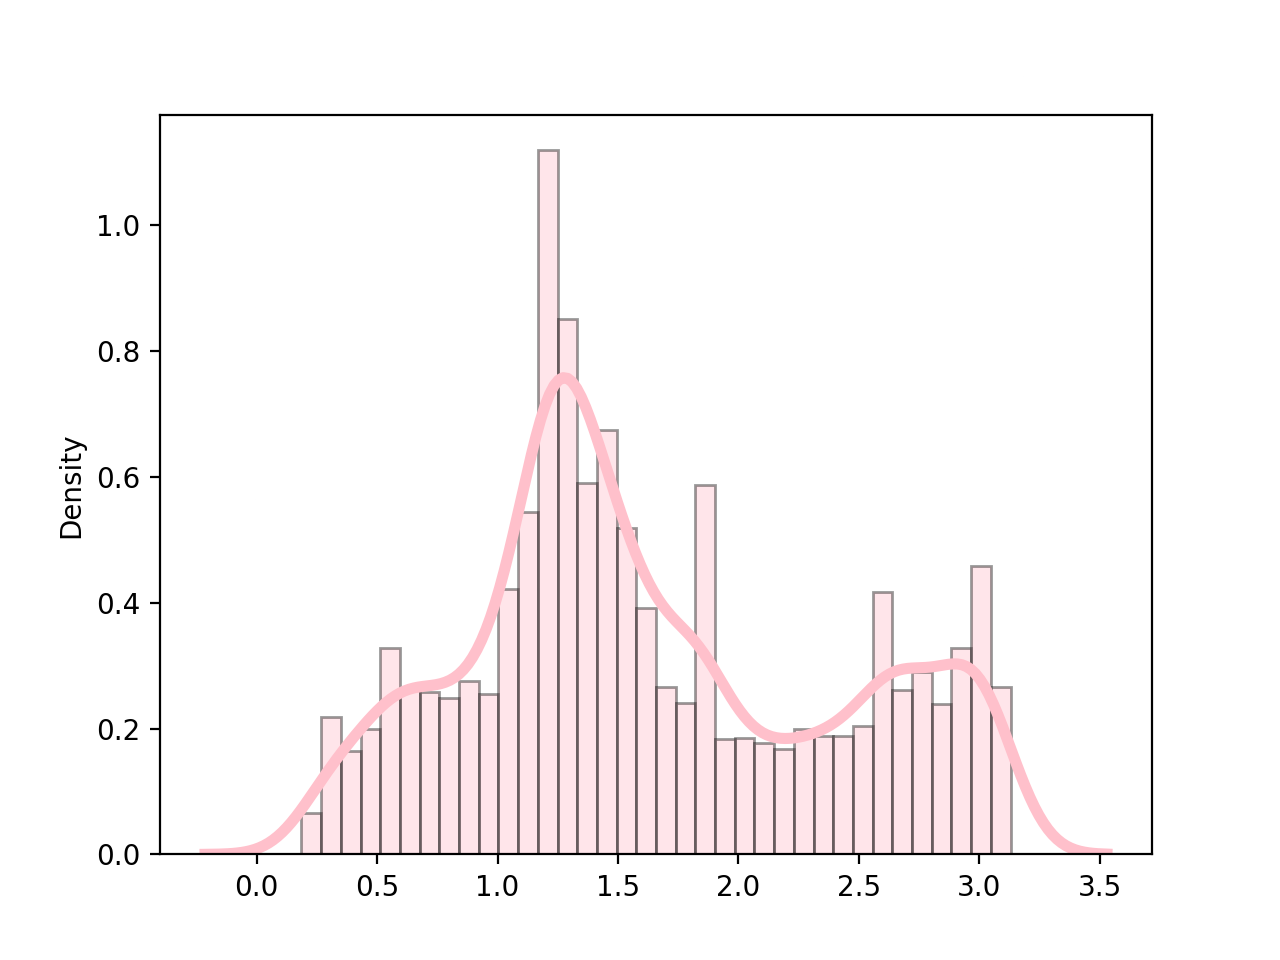

<AxesSubplot:ylabel='Density'>

In [24]:
sns.distplot(frank_fused, hist=True, kde=True, 
             bins=int(180/5), color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<IPython.core.display.Javascript object>


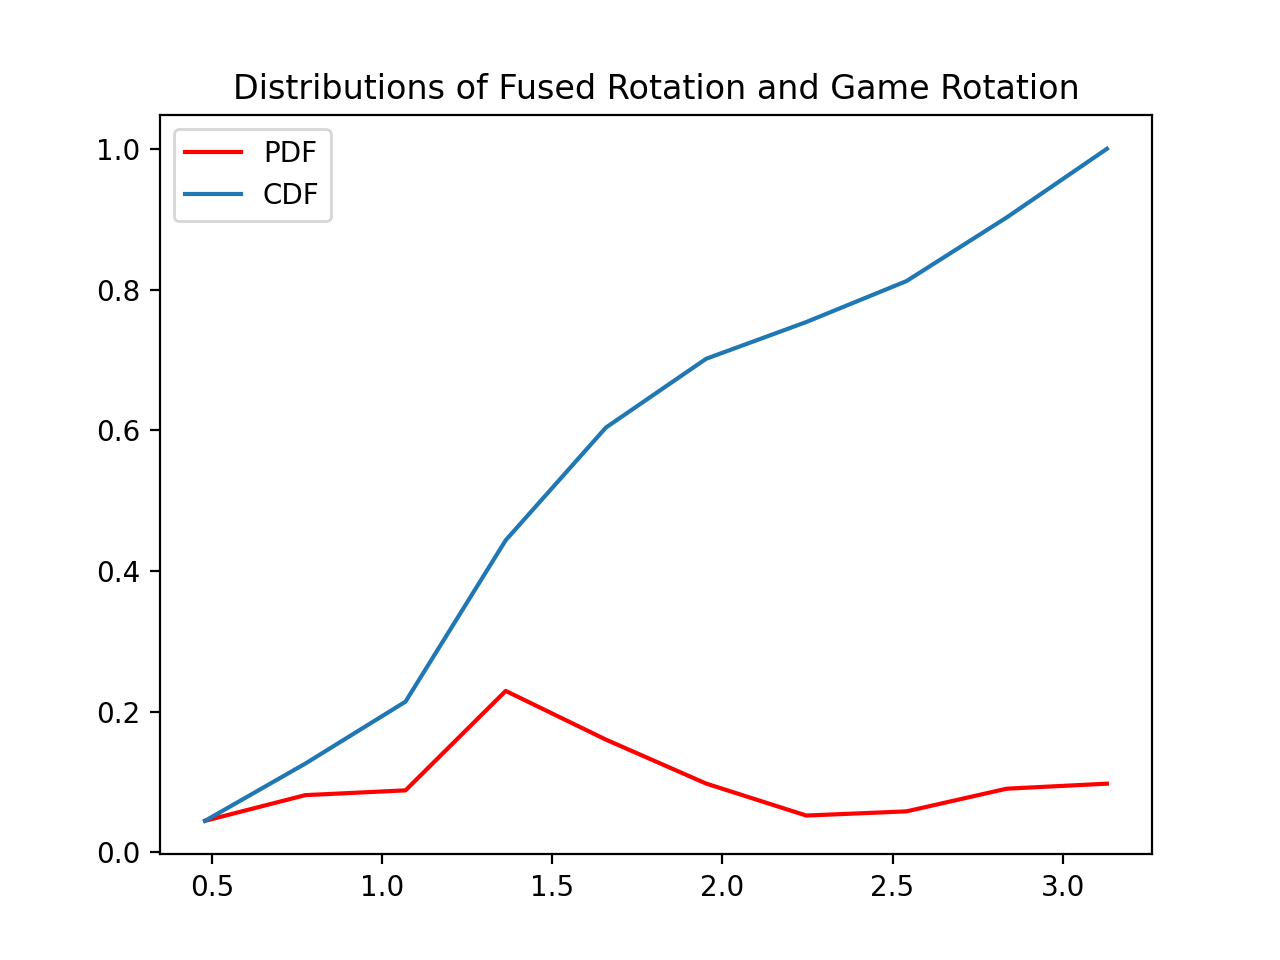

In [29]:
count, bins_count = np.histogram(frank_fused, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title("Distributions of Fused Rotation and Game Rotation")
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

In [21]:
fuseFrank = data['rotation']*data['game_rotation']*frank_fused

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


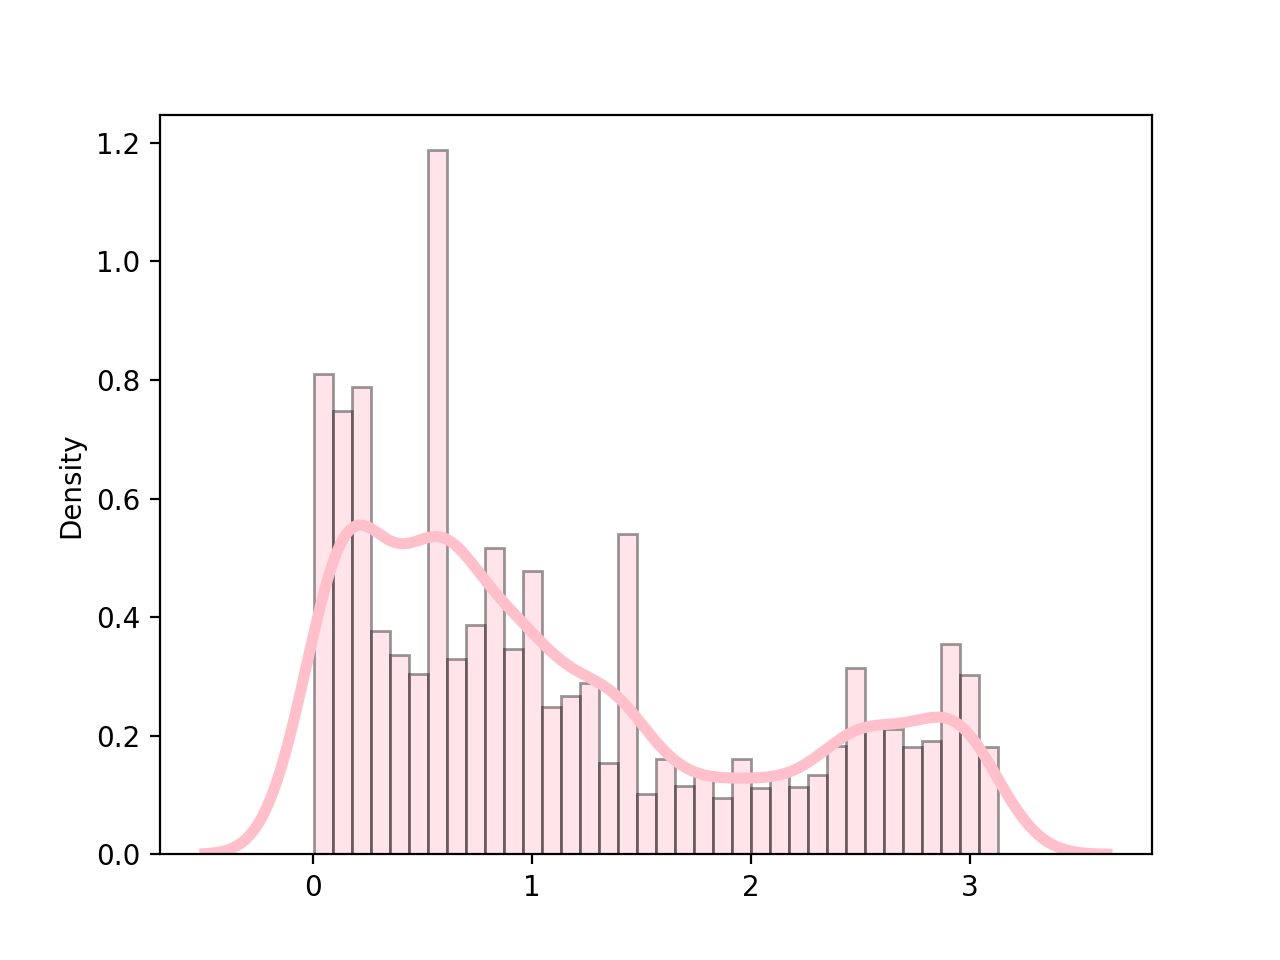

<AxesSubplot:ylabel='Density'>

In [26]:
sns.distplot(fuseFrank, hist=True, kde=True, 
             bins=int(180/5), color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [22]:
fuseFrank

0       0.565175
1       0.517091
2       0.665913
3       0.094609
4       0.700757
          ...   
5888    1.037155
5889    3.026532
5890    1.223264
5891    1.056692
5892    2.214689
Length: 5893, dtype: float64

In [18]:
frank_res_1 = pd.DataFrame({'fused_rot':fuseFrank,'target':data['target']})

<IPython.core.display.Javascript object>


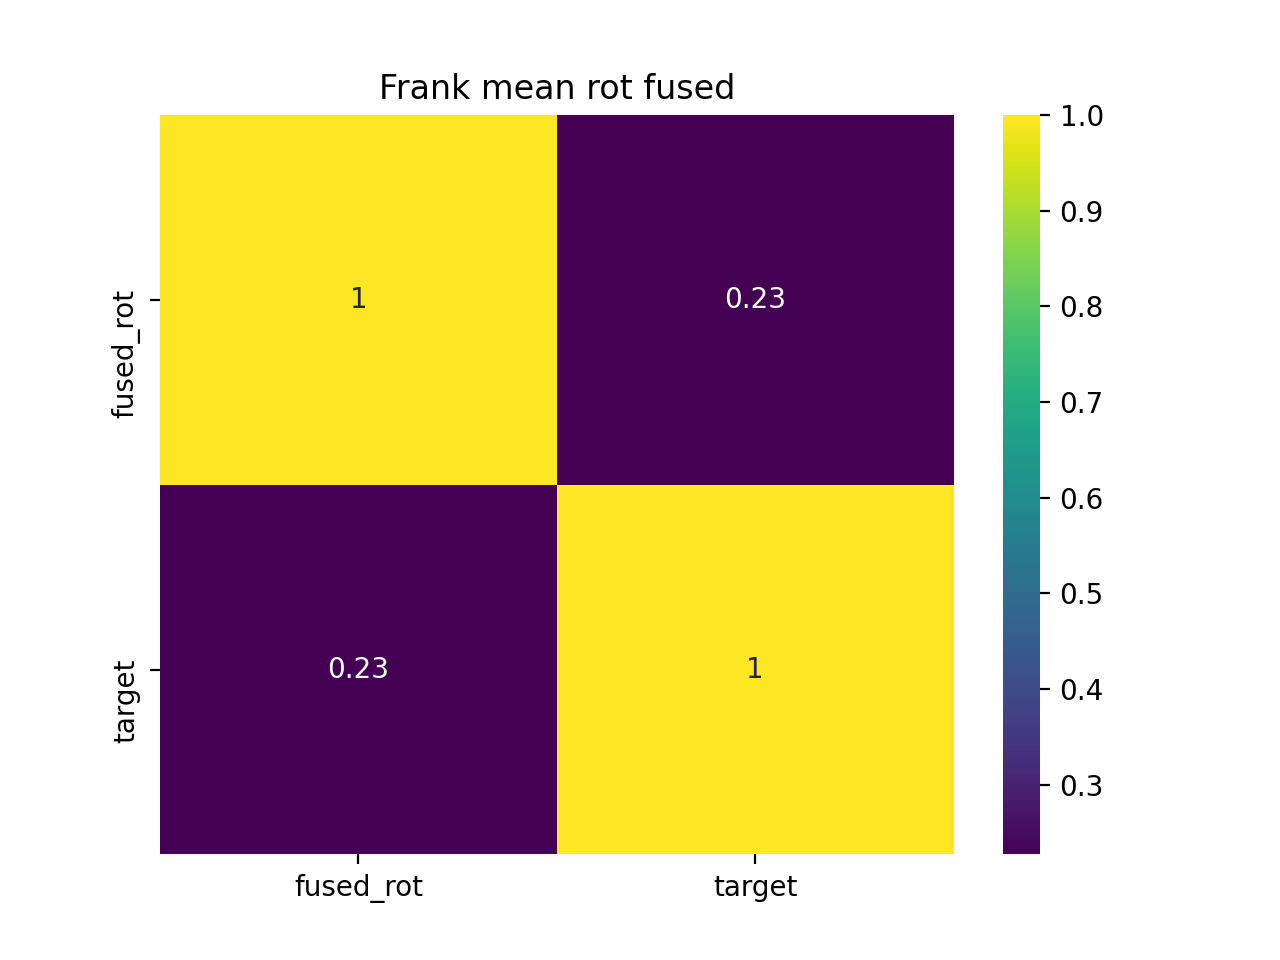

In [19]:
sns.heatmap(frank_res_1.corr(),annot=True,cmap='viridis')
plt.title("Frank mean rot fused")
plt.show()

In [15]:
print(frank_fused)

[1.26194097 0.9214758  1.32276029 ... 1.70644307 1.4850413  2.42986402]


In [16]:
frank_res = pd.DataFrame({'fused_rot':frank_fused,'target':data['target']})

<IPython.core.display.Javascript object>


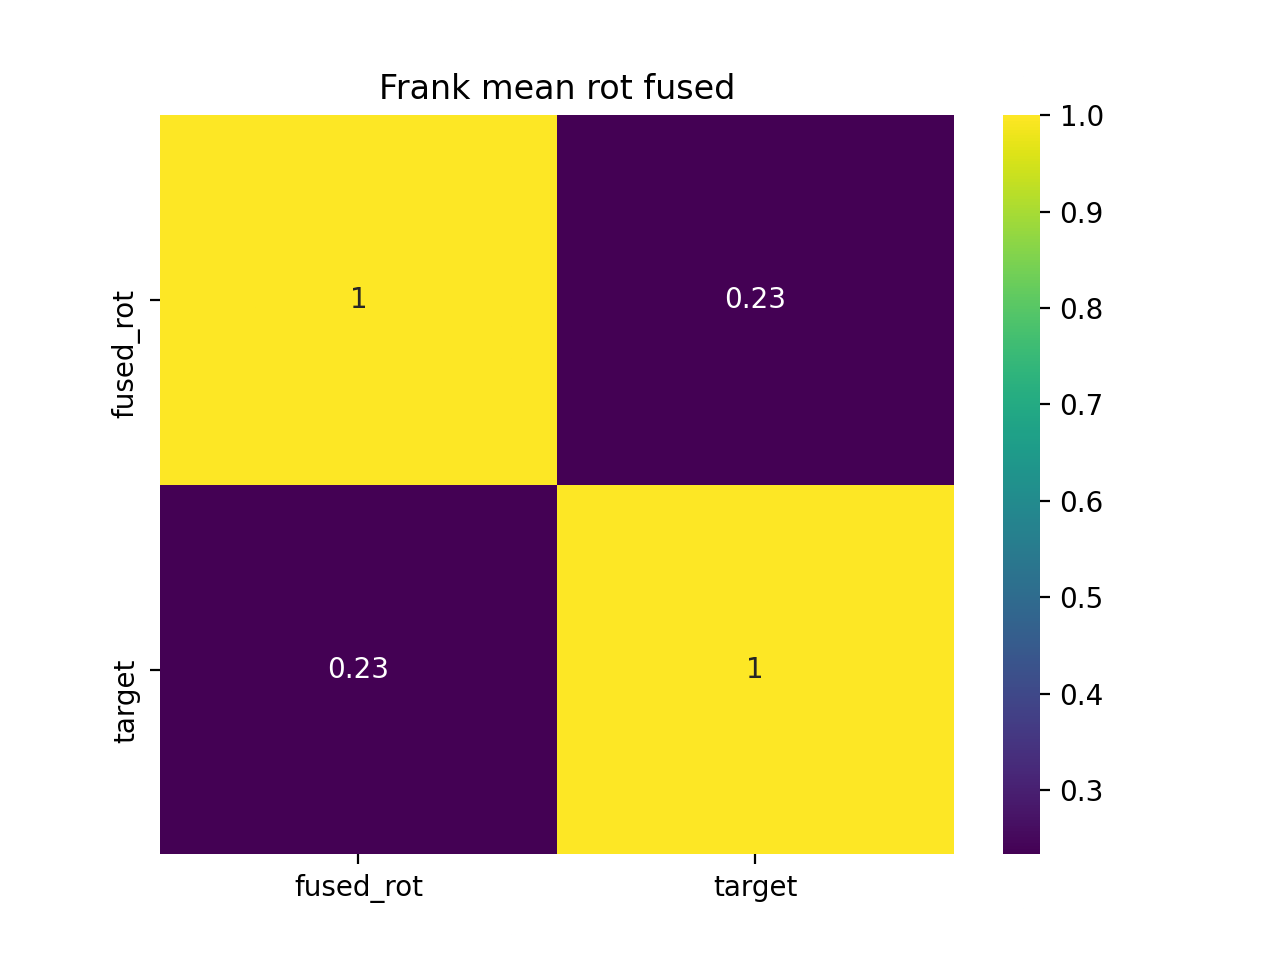

In [21]:
sns.heatmap(frank_res.corr(),annot=True,cmap='viridis')
plt.title("Frank mean rot fused")
plt.show()

In [22]:
frank_res.to_csv('../Data/rot_frank.csv')

In [25]:
frank_res_1.to_csv('../Data/rot_frank_1.csv')

### Clayton

In [18]:
clayton = Clayton()
clayton.fit(X)
fused = clayton.probability_density(X)

In [19]:
print(fused)

[1.23605984 1.16159185 1.27856865 ... 1.48564462 1.43233105 1.7325851 ]


In [20]:
clayton_res = pd.DataFrame({'fused_rot':fused,'target':data['target']})

<IPython.core.display.Javascript object>


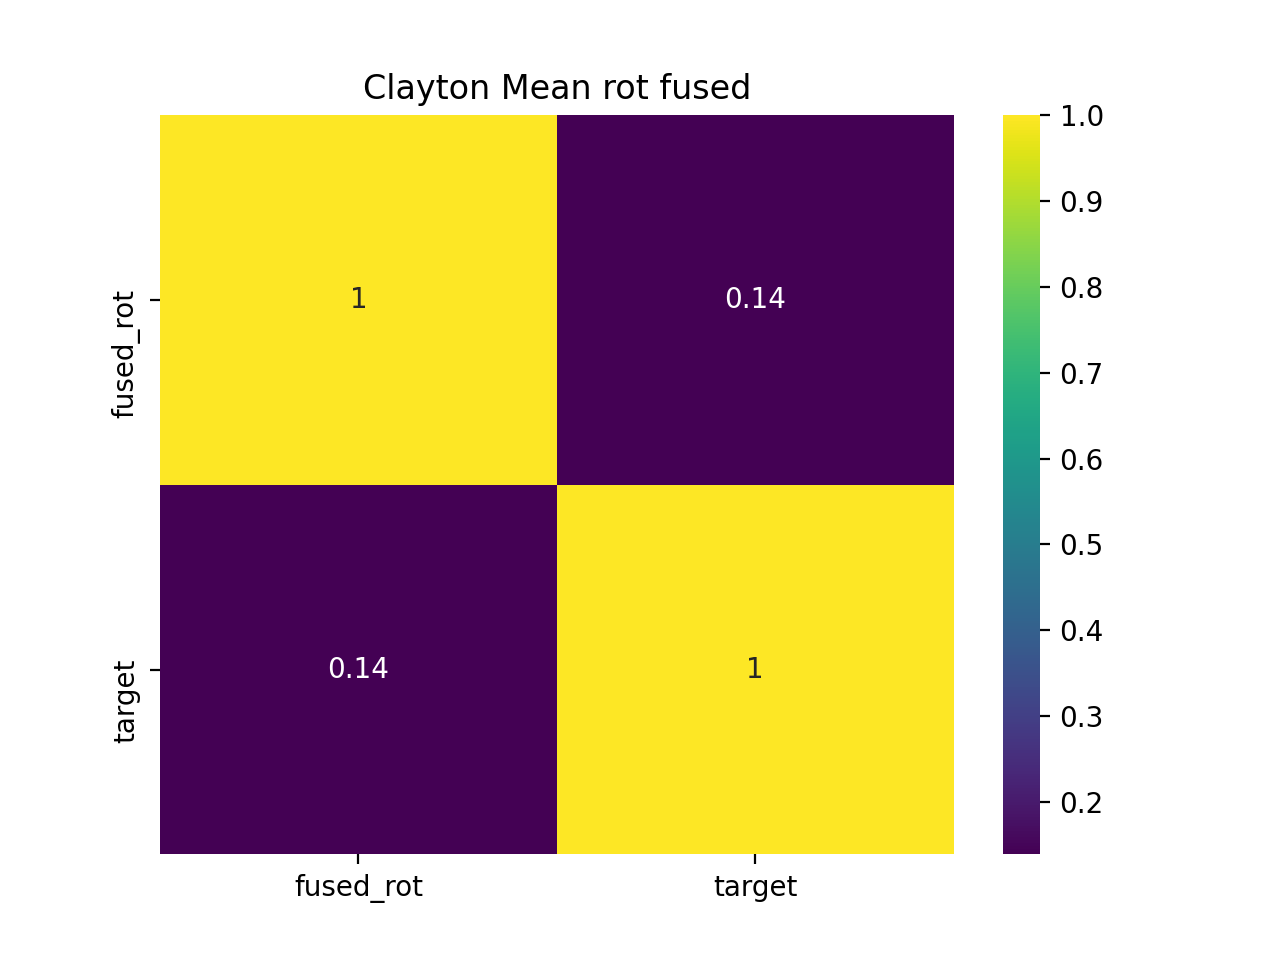

In [28]:
sns.heatmap(clayton_res.corr(),annot=True,cmap='viridis')
plt.title("Clayton Mean rot fused")
plt.show()

### Gumbel

In [22]:
gumbel = Gumbel()
gumbel.fit(X)
fused = gumbel.probability_density(X)

In [23]:
print(fused)

[1.26793642 0.47129478 1.32878842 ... 1.83327839 1.06370009 2.27044007]


In [24]:
gumbel_res = pd.DataFrame({'fused_rot':fused,'target':data['target']})

<IPython.core.display.Javascript object>


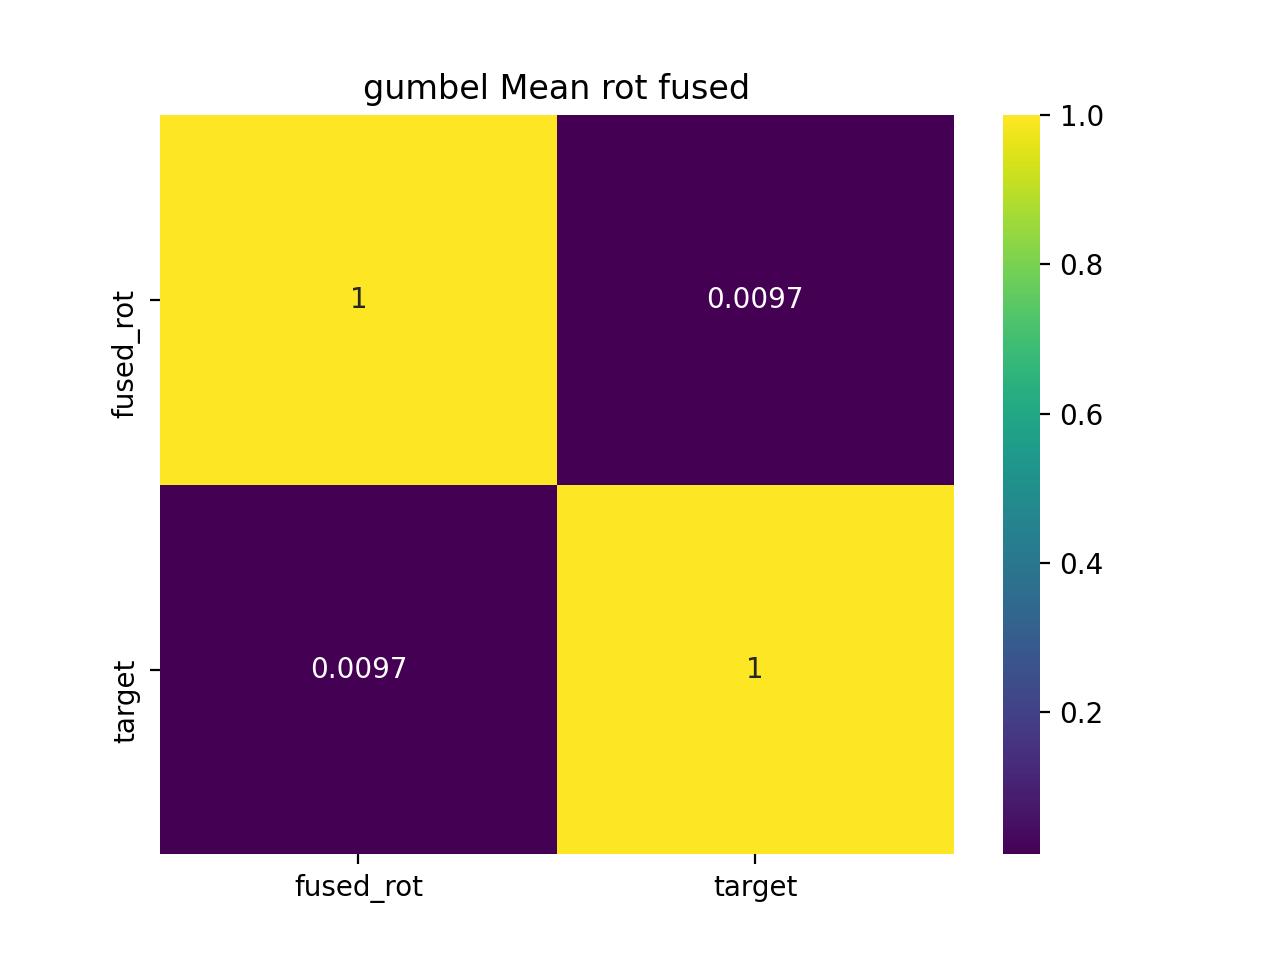

In [29]:
sns.heatmap(gumbel_res.corr(),annot=True,cmap='viridis')
plt.title("gumbel Mean rot fused")
plt.show()